### Dependencies

In [100]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

### Import Data

In [48]:
# Small sample data
dateparse = lambda x1: datetime.strptime(x1, '%Y-%m-%d %H:%M')
df = pd.read_csv('pm25_small.csv', parse_dates = {'datetime_gmt': ['date_gmt', 'time_gmt']}, date_parser = dateparse)
df

,datetime_gmt,state_code,county_code,site_num,poc,latitude_rounded,longitude_rounded,sample_measurement,mdl,method_code
0,2008-03-15 23:00:00,15,1,1012,1,19.510,-155.913,27.0,5,170
1,2008-03-15 13:00:00,15,1,1012,1,19.510,-155.913,14.0,5,170
2,2008-03-15 12:00:00,15,1,1012,1,19.510,-155.913,14.0,5,170
3,2008-03-15 15:00:00,15,1,1012,1,19.510,-155.913,19.0,5,170
4,2008-03-15 16:00:00,15,1,1012,1,19.510,-155.913,14.0,5,170
...,...,...,...,...,...,...,...,...,...,...
249995,2009-06-12 11:00:00,49,53,130,1,37.198,-113.151,4.6,5,170
249996,2009-06-12 14:00:00,6,65,8001,3,34.000,-117.416,13.0,5,170
249997,2009-06-12 08:00:00,6,65,8005,3,33.996,-117.492,12.0,5,170
249998,2009-06-12 21:00:00,30,63,24,3,46.842,-114.021,7.7,5,170


In [49]:
# Small sample data: labels
labels = df['sample_measurement'][:1000]

In [50]:
# Small sample data: datas
df_copy = df.copy()
series_copy = df_copy.apply(lambda x1: x1['datetime_gmt'].timestamp(), axis=1)
df['datetime_gmt'] = series_copy
del df_copy, series_copy

In [51]:
datas = df.drop(['sample_measurement'], axis=1)

In [52]:
datas = datas[:1000]

In [53]:
# Full data
# All 30 mil data here

In [54]:
# Testing out stuff
# df['sample_measurement'][:1000]
# datas

### Preprocess data

In [55]:
datas

,datetime_gmt,state_code,county_code,site_num,poc,latitude_rounded,longitude_rounded,mdl,method_code
0,1.205622e+09,15,1,1012,1,19.510,-155.913,5,170
1,1.205586e+09,15,1,1012,1,19.510,-155.913,5,170
2,1.205582e+09,15,1,1012,1,19.510,-155.913,5,170
3,1.205593e+09,15,1,1012,1,19.510,-155.913,5,170
4,1.205597e+09,15,1,1012,1,19.510,-155.913,5,170
...,...,...,...,...,...,...,...,...,...
995,1.209182e+09,15,1,2016,1,19.204,-155.480,5,170
996,1.209251e+09,15,1,2016,1,19.204,-155.480,5,170
997,1.209190e+09,15,1,2017,1,19.570,-155.081,5,170
998,1.209215e+09,15,1,2017,1,19.570,-155.081,5,170


In [58]:
# Scale
datas_std = StandardScaler().fit_transform(datas)

In [59]:
datas_std

array([[-1.68522481,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       [-1.71677854,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       [-1.71993391,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       ...,
       [ 1.44174991,  0.        ,  0.        , ...,  1.58152112,
         0.        ,  0.        ],
       [ 1.46383752,  0.        ,  0.        , ...,  1.58152112,
         0.        ,  0.        ],
       [ 1.46068215,  0.        ,  0.        , ...,  1.58152112,
         0.        ,  0.        ]])

In [60]:
datas_std = pd.DataFrame(datas_std, columns=datas.columns)

In [61]:
datas_std

,datetime_gmt,state_code,county_code,site_num,poc,latitude_rounded,longitude_rounded,mdl,method_code
0,-1.685225,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
1,-1.716779,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
2,-1.719934,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
3,-1.710468,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
4,-1.707312,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,1.435439,0.0,0.0,1.078135,0.0,-1.782165,0.415074,0.0,0.0
996,1.495391,0.0,0.0,1.078135,0.0,-1.782165,0.415074,0.0,0.0
997,1.441750,0.0,0.0,1.080132,0.0,0.847160,1.581521,0.0,0.0
998,1.463838,0.0,0.0,1.080132,0.0,0.847160,1.581521,0.0,0.0


### Split Data

In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(datas_std, labels, test_size=0.33)

In [64]:
xTrain

,datetime_gmt,state_code,county_code,site_num,poc,latitude_rounded,longitude_rounded,mdl,method_code
194,-1.114102,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
343,-0.656573,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
378,-0.501960,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
324,-0.722836,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
537,0.438341,0.0,0.0,1.080132,0.0,0.847160,1.581521,0.0,0.0
...,...,...,...,...,...,...,...,...,...
370,-0.615553,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
102,-1.407552,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
289,-0.849051,0.0,0.0,-0.926680,0.0,0.416123,-0.850770,0.0,0.0
944,1.280826,0.0,0.0,1.078135,0.0,-1.782165,0.415074,0.0,0.0


In [66]:
# make to numpy
x_train = xTrain.to_numpy()
y_train = yTrain.to_numpy()
x_test = xTest.to_numpy()
y_test = yTest.to_numpy()

In [67]:
x_train

array([[-1.11410228,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       [-0.65657319,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       [-0.5019599 ,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       ...,
       [-0.84905094,  0.        ,  0.        , ..., -0.85076974,
         0.        ,  0.        ],
       [ 1.28082588,  0.        ,  0.        , ...,  0.41507394,
         0.        ,  0.        ],
       [ 1.00315305,  0.        ,  0.        , ...,  0.41507394,
         0.        ,  0.        ]])

In [97]:
# svrModel = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svrModel = SVR(kernel = 'rbf', epsilon = 0.2)

In [98]:
svrModel.fit(x_train, y_train)

SVR(epsilon=0.2)

In [99]:
yHat = svrModel.predict(x_test)

In [113]:
print(f'MSE {metrics.mean_squared_error(y_test, yHat)}')
print(f'MAE {metrics.mean_absolute_error(y_test, yHat)}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, yHat)}')
print(f'R^2 {metrics.r2_score(y_test, yHat)}')

MSE 43.04557467702368
MAE 4.508447274826145
MAE 575704314119829.9
R^2 0.5969338388020269


In [81]:
print(f'MSE {metrics.mean_squared_error(y_test, yHat)}')
print(f'MAE {metrics.mean_absolute_error(y_test, yHat)}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, yHat)}')
print(f'R^2 {metrics.r2_score(y_test, yHat)}')

MSE 43.04557467702368
MAE 4.508447274826145
R^2 0.5969338388020269


In [89]:
print(f'MSE {metrics.mean_squared_error(y_test, yHat)}')
print(f'MAE {metrics.mean_absolute_error(y_test, yHat)}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, yHat)}')
print(f'R^2 {metrics.r2_score(y_test, yHat)}')

MSE 43.18689565925138
MAE 4.517284853757631
R^2 0.5956105504911926


### Cross Validation

In [93]:
cvSVR = GridSearchCV(SVR(), [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'epsilon': [0.1, 0.2, 0.3]}], cv=5, scoring='neg_mean_squared_error')
# scoring = 'neg_mean_absolute_error'
# scoring = 'r2'

In [94]:
cvSVR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'epsilon': [0.1, 0.2, 0.3],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='neg_mean_squared_error')

In [92]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [96]:
print(cvSVR.best_params_)

{'epsilon': 0.2, 'kernel': 'rbf'}


### Plots!

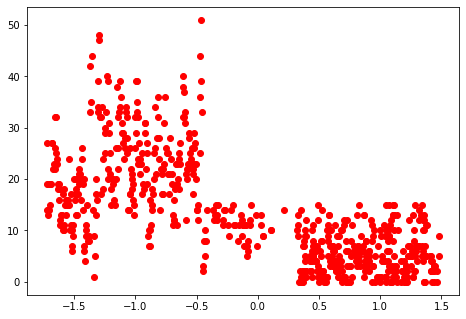

In [107]:
# plt.scatter(x_train, y_train, color='red')
# plt.plot(x_test, yHat, color='blue')
# plt.title('Title')
# plt.show()

fig = plt.figure()
graph = fig.add_axes([0,0,1,1])
graph.scatter(xTrain['datetime_gmt'], y_train, color='red')

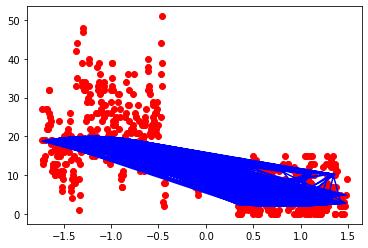

In [111]:
plt.scatter(xTrain['datetime_gmt'], y_train, color='red')
plt.plot(xTrain['datetime_gmt'], svrModel.predict(x_train), color='blue')

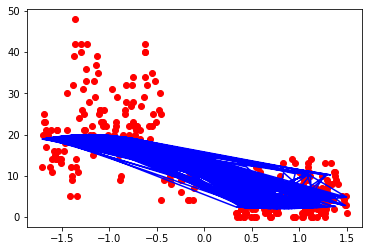

In [112]:
plt.scatter(xTest['datetime_gmt'], y_test, color='red')
plt.plot(xTest['datetime_gmt'], svrModel.predict(x_test), color='blue')